In [2]:
import pandas as pd
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [3]:
df = pd.read_csv('films.csv')

In [4]:
df.head()

,web-scraper-order,web-scraper-start-url,films,films-href,title,genres,image-src,number
0,1678809742-1462,https://letterboxd.com/prof_ratigan/list/top-5...,Mortal World (2018),https://letterboxd.com/film/mortal-world/,Mortal World,"[{""genres"":""action""},{""genres"":""comedy""}]",https://a.ltrbxd.com/resized/film-poster/4/2/9...,5000
1,1678809744-1463,https://letterboxd.com/prof_ratigan/list/top-5...,A Ghost Story (2017),https://letterboxd.com/film/a-ghost-story-2017/,A Ghost Story,"[{""genres"":""drama""},{""genres"":""fantasy""}]",https://a.ltrbxd.com/resized/sm/upload/zx/51/y...,4999
2,1678809747-1464,https://letterboxd.com/prof_ratigan/list/top-5...,Raining Stones (1993),https://letterboxd.com/film/raining-stones/,Raining Stones,"[{""genres"":""comedy""},{""genres"":""drama""}]",https://a.ltrbxd.com/resized/film-poster/4/3/1...,4998
3,1678809749-1465,https://letterboxd.com/prof_ratigan/list/top-5...,The Needle (1988),https://letterboxd.com/film/the-needle/,The Needle,"[{""genres"":""mystery""},{""genres"":""drama""},{""gen...",https://a.ltrbxd.com/resized/film-poster/3/8/7...,4997
4,1678809752-1466,https://letterboxd.com/prof_ratigan/list/top-5...,Colorful (2010),https://letterboxd.com/film/colorful/,Colorful,"[{""genres"":""drama""},{""genres"":""animation""},{""g...",https://a.ltrbxd.com/resized/film-poster/1/8/8...,4996


In [5]:
row = df.iloc[0]
row_genres = json.loads(row.genres)
print(row_genres[0]["genres"])

action


In [6]:
genres = {}
genres_list = []

for row in tqdm(df.itertuples()):
    row_genres = json.loads(row.genres)
    for genre in row_genres:
        a = genre["genres"]
        if a not in genres:
            genres[a] = 1
        else:
            genres[a] += 1
            
        genres_list += [a]
            
print(genres)

5000it [00:00, 166692.00it/s]

{'action': 542, 'comedy': 1334, 'drama': 3438, 'fantasy': 344, 'mystery': 387, 'thriller': 841, 'animation': 241, 'family': 260, 'romance': 1139, 'crime': 801, 'science-fiction': 238, 'adventure': 429, 'western': 154, 'history': 367, 'tv-movie': 42, 'music': 259, 'documentary': 270, 'horror': 279, 'war': 305}


In [7]:
unique_genre = {}

for row in tqdm(df.itertuples()):
    row_genres = json.loads(row.genres)
    if len(row_genres) == 1:
        a = row_genres[0]["genres"]
        if a not in unique_genre:
            unique_genre[a] = 1
        else:
            unique_genre[a] += 1
            
unique_genre

5000it [00:00, 217513.04it/s]


{'drama': 711,
 'western': 46,
 'comedy': 124,
 'horror': 26,
 'music': 2,
 'adventure': 6,
 'documentary': 166,
 'family': 1,
 'action': 10,
 'thriller': 5,
 'science-fiction': 3,
 'war': 1,
 'romance': 1,
 'crime': 3,
 'fantasy': 1}

In [8]:
genre2num = genres
num2genre = {}
i = 0

for genre in genres:
    genre2num[genre] = i
    num2genre[i] = genre
    i += 1
    
genre2num, num2genre

({'action': 0,
  'comedy': 1,
  'drama': 2,
  'fantasy': 3,
  'mystery': 4,
  'thriller': 5,
  'animation': 6,
  'family': 7,
  'romance': 8,
  'crime': 9,
  'science-fiction': 10,
  'adventure': 11,
  'western': 12,
  'history': 13,
  'tv-movie': 14,
  'music': 15,
  'documentary': 16,
  'horror': 17,
  'war': 18},
 {0: 'action',
  1: 'comedy',
  2: 'drama',
  3: 'fantasy',
  4: 'mystery',
  5: 'thriller',
  6: 'animation',
  7: 'family',
  8: 'romance',
  9: 'crime',
  10: 'science-fiction',
  11: 'adventure',
  12: 'western',
  13: 'history',
  14: 'tv-movie',
  15: 'music',
  16: 'documentary',
  17: 'horror',
  18: 'war'})

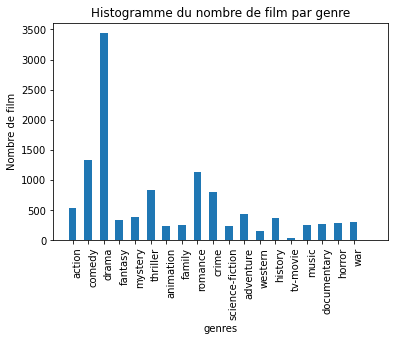

In [9]:
val = list(genres.values())
names = list(genres.keys())

plt.hist(genres_list, bins=range(0,len(names)+2), align='left', rwidth=0.5)
plt.title("Histogramme du nombre de film par genre")
plt.xlabel("genres")
plt.ylabel("Nombre de film")

plt.xticks(range(0,len(names)), names, rotation ='vertical', ha='left')

plt.show()

In [10]:
def p2(best):
    comptages = []
    films = []
    for n in best:
        comptage = 0
        best_without_n = [m for m in best if m != n]
        for row in df.itertuples():
            c = True
            d = False
            row_genres = json.loads(row.genres)
            for genre in row_genres:
                if genre2num[genre["genres"]] in best_without_n:
                    c = False
                    break
                if genre2num[genre["genres"]] == n:
                    d = True
            if c and d:
                comptage += 1
                films += [{"film_id": row.number, "genre":num2genre[n], "image":row[7]}]
        comptages += [comptage]
    return comptages,films

#p2((0,1,2))

In [11]:
from sklearn.metrics import confusion_matrix

A = []
B = []

for row in tqdm(df.itertuples()):
    row_genres = json.loads(row.genres)
    for genre1 in row_genres:
        for genre2 in row_genres:
            A += [genre2num[genre1["genres"]]]
            B += [genre2num[genre2["genres"]]] 
            
confusion_matrix = confusion_matrix(A, B)
np.set_printoptions(linewidth=np.inf)
print(confusion_matrix)

5000it [00:00, 161104.99it/s]

[[ 542   99  253   50   20  180   38   17   47  149   76  153   29   46    3    6    1    8   52]
 [  99 1334  699  114   52   68   71  108  439  140   37  109   18   24   10  108    6   36   40]
 [ 253  699 3438  157  213  541   68  102  878  561   82  164   57  332   24  129   14   90  251]
 [  50  114  157  344   25   17   97   89   75    7   24  106    1    2    6   21    1   41    2]
 [  20   52  213   25  387  220   21    7   39  150   24   13    4    6    2    1    1   82    6]
 [ 180   68  541   17  220  841   10    0   69  388   49   53    8   25    3    2    0  105   33]
 [  38   71   68   97   21   10  241  117   26   10   42   91    0    5    4   10    5    5    9]
 [  17  108  102   89    7    0  117  260   38    3    7  100    3    3    4   16    2    3    2]
 [  47  439  878   75   39   69   26   38 1139   93   17   61   25   68    5   89    1   11   59]
 [ 149  140  561    7  150  388   10    3   93  801    3   22    8   17    2    7    8   16    6]
 [  76   37   82   2

In [12]:
def p2fast(num, confusion_matrix):
    #donne une approximation du nombre de film par classe qui ne sont pas dans les autres classes (erreur du au fait de la matrice de confusion)
    comptages = []
    for n in num:
        comptage = 0
        comptage += confusion_matrix[n,n]
        num_without_n = [m for m in num if m != n]
        for m in num_without_n:
            comptage -= confusion_matrix[n,m]
        
        comptages += [comptage]
    return comptages

p2fast((0,1,2), confusion_matrix)

[190, 536, 2486]

In [13]:
def p(confusion_matrix, i, I):
    global num2genre
    
    i1 = i
    
    b = 0
    
    for i in I:
        b += confusion_matrix[i1,i]
        
    b -= confusion_matrix[i1,i1]
    
    if confusion_matrix[i1,i1] < 100: #elimination des classes trop petites
        return -np.inf
    
    a = np.log(confusion_matrix[i1,i1])
    
    if b != 0:
        b = np.log(b)
    else:
        b = 0
    
    if num2genre[i1] in unique_genre:
        c = np.log(unique_genre[num2genre[i1]] + 1)
    else:
        c = 0
    
    x = p2fast(I, confusion_matrix)
    mean = np.mean(x)
    std = np.mean(x)
    
    if std <= 0:
        xb = 0
    else:
        xb = np.log(std)
    
    if mean <= 0:
        xa = 0
    else:
        xa = np.log(mean)
    
    #return xa - xb

    return a - b + xa + xb

p(confusion_matrix, 0, [0,1,2,3,4,5])

10.89752497722028

In [14]:
m = -np.inf
best = []

import itertools

ensemble = {i for i in num2genre}
sous_parties = list(itertools.combinations(ensemble, 9))

for num in tqdm(sous_parties):
    s = 0
    for n in num:
        s += p(confusion_matrix, n, num)

    if s>m:
        m = s
        best = num

best_n = {genre:0 for genre in [num2genre[n] for n in best]}
number_of_unique_movie = 0

for row in df.itertuples():
    row_genres = json.loads(row.genres)
    for genre in row_genres:
        a = genre["genres"]
        if a in best_n:
            number_of_unique_movie += 1
            break
            
number_of_unique_movie

100%|██████████████████████████████████████████████████████████████████████████| 92378/92378 [00:36<00:00, 2517.94it/s]


3262

In [15]:
best

(7, 8, 9, 10, 12, 13, 16, 17, 18)

In [16]:
n_genre_choosen = [confusion_matrix[n,n] for n in best]
moy = np.mean(n_genre_choosen)
var = np.std(n_genre_choosen)
med = np.median(n_genre_choosen)
m = min(n_genre_choosen)
M = max(n_genre_choosen)

for n in best:
    print(n, num2genre[n], confusion_matrix[n,n])

print()
print("moy", moy, ", var", var, ", med", med, ", min", m, ", max", M, ", number_of_unique_movie", number_of_unique_movie)

7 family 260
8 romance 1139
9 crime 801
10 science-fiction 238
12 western 154
13 history 367
16 documentary 270
17 horror 279
18 war 305

moy 423.6666666666667 , var 307.29934736163835 , med 279.0 , min 154 , max 1139 , number_of_unique_movie 3262


In [72]:
print(p2(best)[0], sum(p2(best)[0]))
df_films = pd.DataFrame(p2(best)[1])
df_films

[201, 847, 652, 162, 110, 185, 230, 200, 149] 2736


,film_id,genre,image
0,4996,family,https://a.ltrbxd.com/resized/film-poster/1/8/8...
1,4962,family,https://a.ltrbxd.com/resized/film-poster/1/1/3...
2,4951,family,https://a.ltrbxd.com/resized/film-poster/4/0/7...
3,4942,family,https://a.ltrbxd.com/resized/film-poster/4/5/1...
4,4928,family,https://a.ltrbxd.com/resized/film-poster/3/9/8...
...,...,...,...
2731,58,war,https://a.ltrbxd.com/resized/film-poster/5/1/2...
2732,51,war,https://a.ltrbxd.com/resized/film-poster/5/1/9...
2733,42,war,https://a.ltrbxd.com/resized/film-poster/5/1/2...
2734,36,war,https://a.ltrbxd.com/resized/film-poster/2/6/9...


In [18]:
#df_films.to_csv('films_choisis.csv')

In [19]:
p2fast(best, confusion_matrix)

[199, 827, 647, 161, 105, 163, 227, 198, 132]

In [20]:
#Creation de la repartition en base de Test, d'évaluation et d'apprentissage (10%, 10%, 80%)

In [36]:
bdd_separate = []
films = []
test = 0
eva = 0
appr = 0

for row in tqdm(df_films.itertuples()):
    
    r = rd.random()
    
    if r < 0.1:
        bdd = "Test"
        test += 1
    elif r < 0.2:
        bdd = "Evaluation"
        eva += 1
    else:
        bdd = "Apprentissage"
        appr += 1
    
    films += [{"film_id": row.film_id, "genre":row.genre, "image":row.image, "bdd": bdd}]

print(test,eva,appr)

2736it [00:00, 684335.13it/s]

264 264 2208


In [37]:
df_films = pd.DataFrame(films)
df_films

,film_id,genre,image,bdd
0,4996,family,https://a.ltrbxd.com/resized/film-poster/1/8/8...,Apprentissage
1,4962,family,https://a.ltrbxd.com/resized/film-poster/1/1/3...,Apprentissage
2,4951,family,https://a.ltrbxd.com/resized/film-poster/4/0/7...,Test
3,4942,family,https://a.ltrbxd.com/resized/film-poster/4/5/1...,Evaluation
4,4928,family,https://a.ltrbxd.com/resized/film-poster/3/9/8...,Apprentissage
...,...,...,...,...
2731,58,war,https://a.ltrbxd.com/resized/film-poster/5/1/2...,Evaluation
2732,51,war,https://a.ltrbxd.com/resized/film-poster/5/1/9...,Apprentissage
2733,42,war,https://a.ltrbxd.com/resized/film-poster/5/1/2...,Test
2734,36,war,https://a.ltrbxd.com/resized/film-poster/2/6/9...,Apprentissage


In [38]:
df_films.to_csv('films_choisis.csv')

In [58]:
nb_genre_test = []
nb_genre_apprentissage = []
nb_genre_evaluation = []

for row in tqdm(df_films.itertuples()):
    bdd = row.bdd
    if bdd == "Test":
        nb_genre_test += [row.genre]
    elif bdd == "Evaluation":
        nb_genre_evaluation += [row.genre]
    elif bdd == "Apprentissage":
        nb_genre_apprentissage += [row.genre]
            


2736it [00:00, 684253.52it/s]


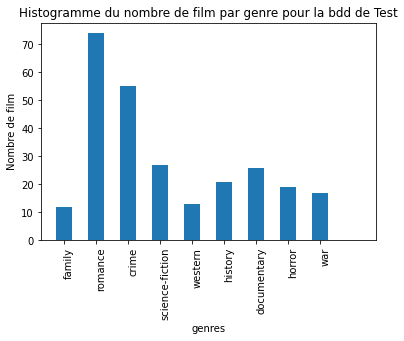

In [69]:
plt.hist(nb_genre_test, bins=range(0,len(names)+2), align='left', rwidth=0.5)
plt.title("Histogramme du nombre de film par genre pour la bdd de Test")
plt.xlabel("genres")
plt.ylabel("Nombre de film")

plt.xticks(range(0,len(names)), names, rotation ='vertical', ha='left')

plt.show()

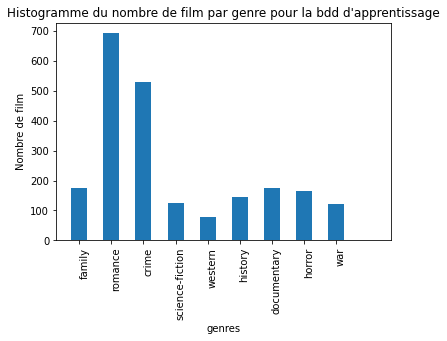

In [70]:
plt.hist(nb_genre_apprentissage, bins=range(0,len(names)+2), align='left', rwidth=0.5)
plt.title("Histogramme du nombre de film par genre pour la bdd d'apprentissage")
plt.xlabel("genres")
plt.ylabel("Nombre de film")

plt.xticks(range(0,len(names)), names, rotation ='vertical', ha='left')

plt.show()

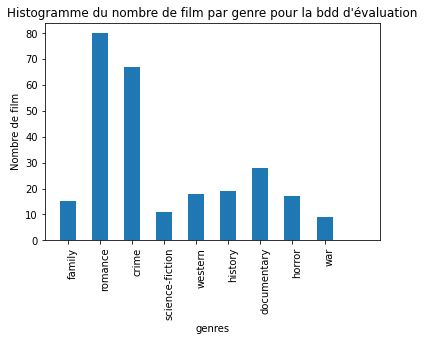

In [71]:
plt.hist(nb_genre_evaluation, bins=range(0,len(names)+2), align='left', rwidth=0.5)
plt.title("Histogramme du nombre de film par genre pour la bdd d'évaluation")
plt.xlabel("genres")
plt.ylabel("Nombre de film")

plt.xticks(range(0,len(names)), names, rotation ='vertical', ha='left')

plt.show()